# **データ変換**

8.1 離散化

In [2]:
# 必要なライブラリのインポート
!pip install japanize_matplotlib
import pandas as pd

# transaction_history.csvをData Frameに読み込み
transaction_history = pd.read_csv('transaction_history.csv', dtype={'customer_id': str})

# customer_idごとにpurchase_amountの合計を計算
customer_purchase_sum = transaction_history.groupby('customer_id')['purchase_amount'].sum().reset_index()

# 結果の表示
customer_purchase_sum.head()

,customer_id,purchase_amount
0,00010000,9300
1,00010001,8300
2,00010002,164700
3,00010003,46000
4,00010004,69300


In [3]:
# 分位点（5分割：20%ごと）を計算
quantiles = customer_purchase_sum['purchase_amount'].quantile([0.2, 0.4, 0.6, 0.8])

# ランク付け関数の定義
def categorize_purchase(amount):
    if amount <= quantiles[0.2]:
        return 'Very Low'
    elif amount <= quantiles[0.4]:
        return 'Low'
    elif amount <= quantiles[0.6]:
        return 'Medium'
    elif amount <= quantiles[0.8]:
        return 'High'
    else:
        return 'Very High'

# ランク列の追加
customer_purchase_sum['purchase_rank'] = customer_purchase_sum['purchase_amount'].apply(categorize_purchase)

# 結果の確認
customer_purchase_sum.head()

,customer_id,purchase_amount,purchase_rank
0,00010000,9300,Very Low
1,00010001,8300,Very Low
2,00010002,164700,High
3,00010003,46000,Low
4,00010004,69300,Medium


8.2 Monetaryのヒストグラムの描画

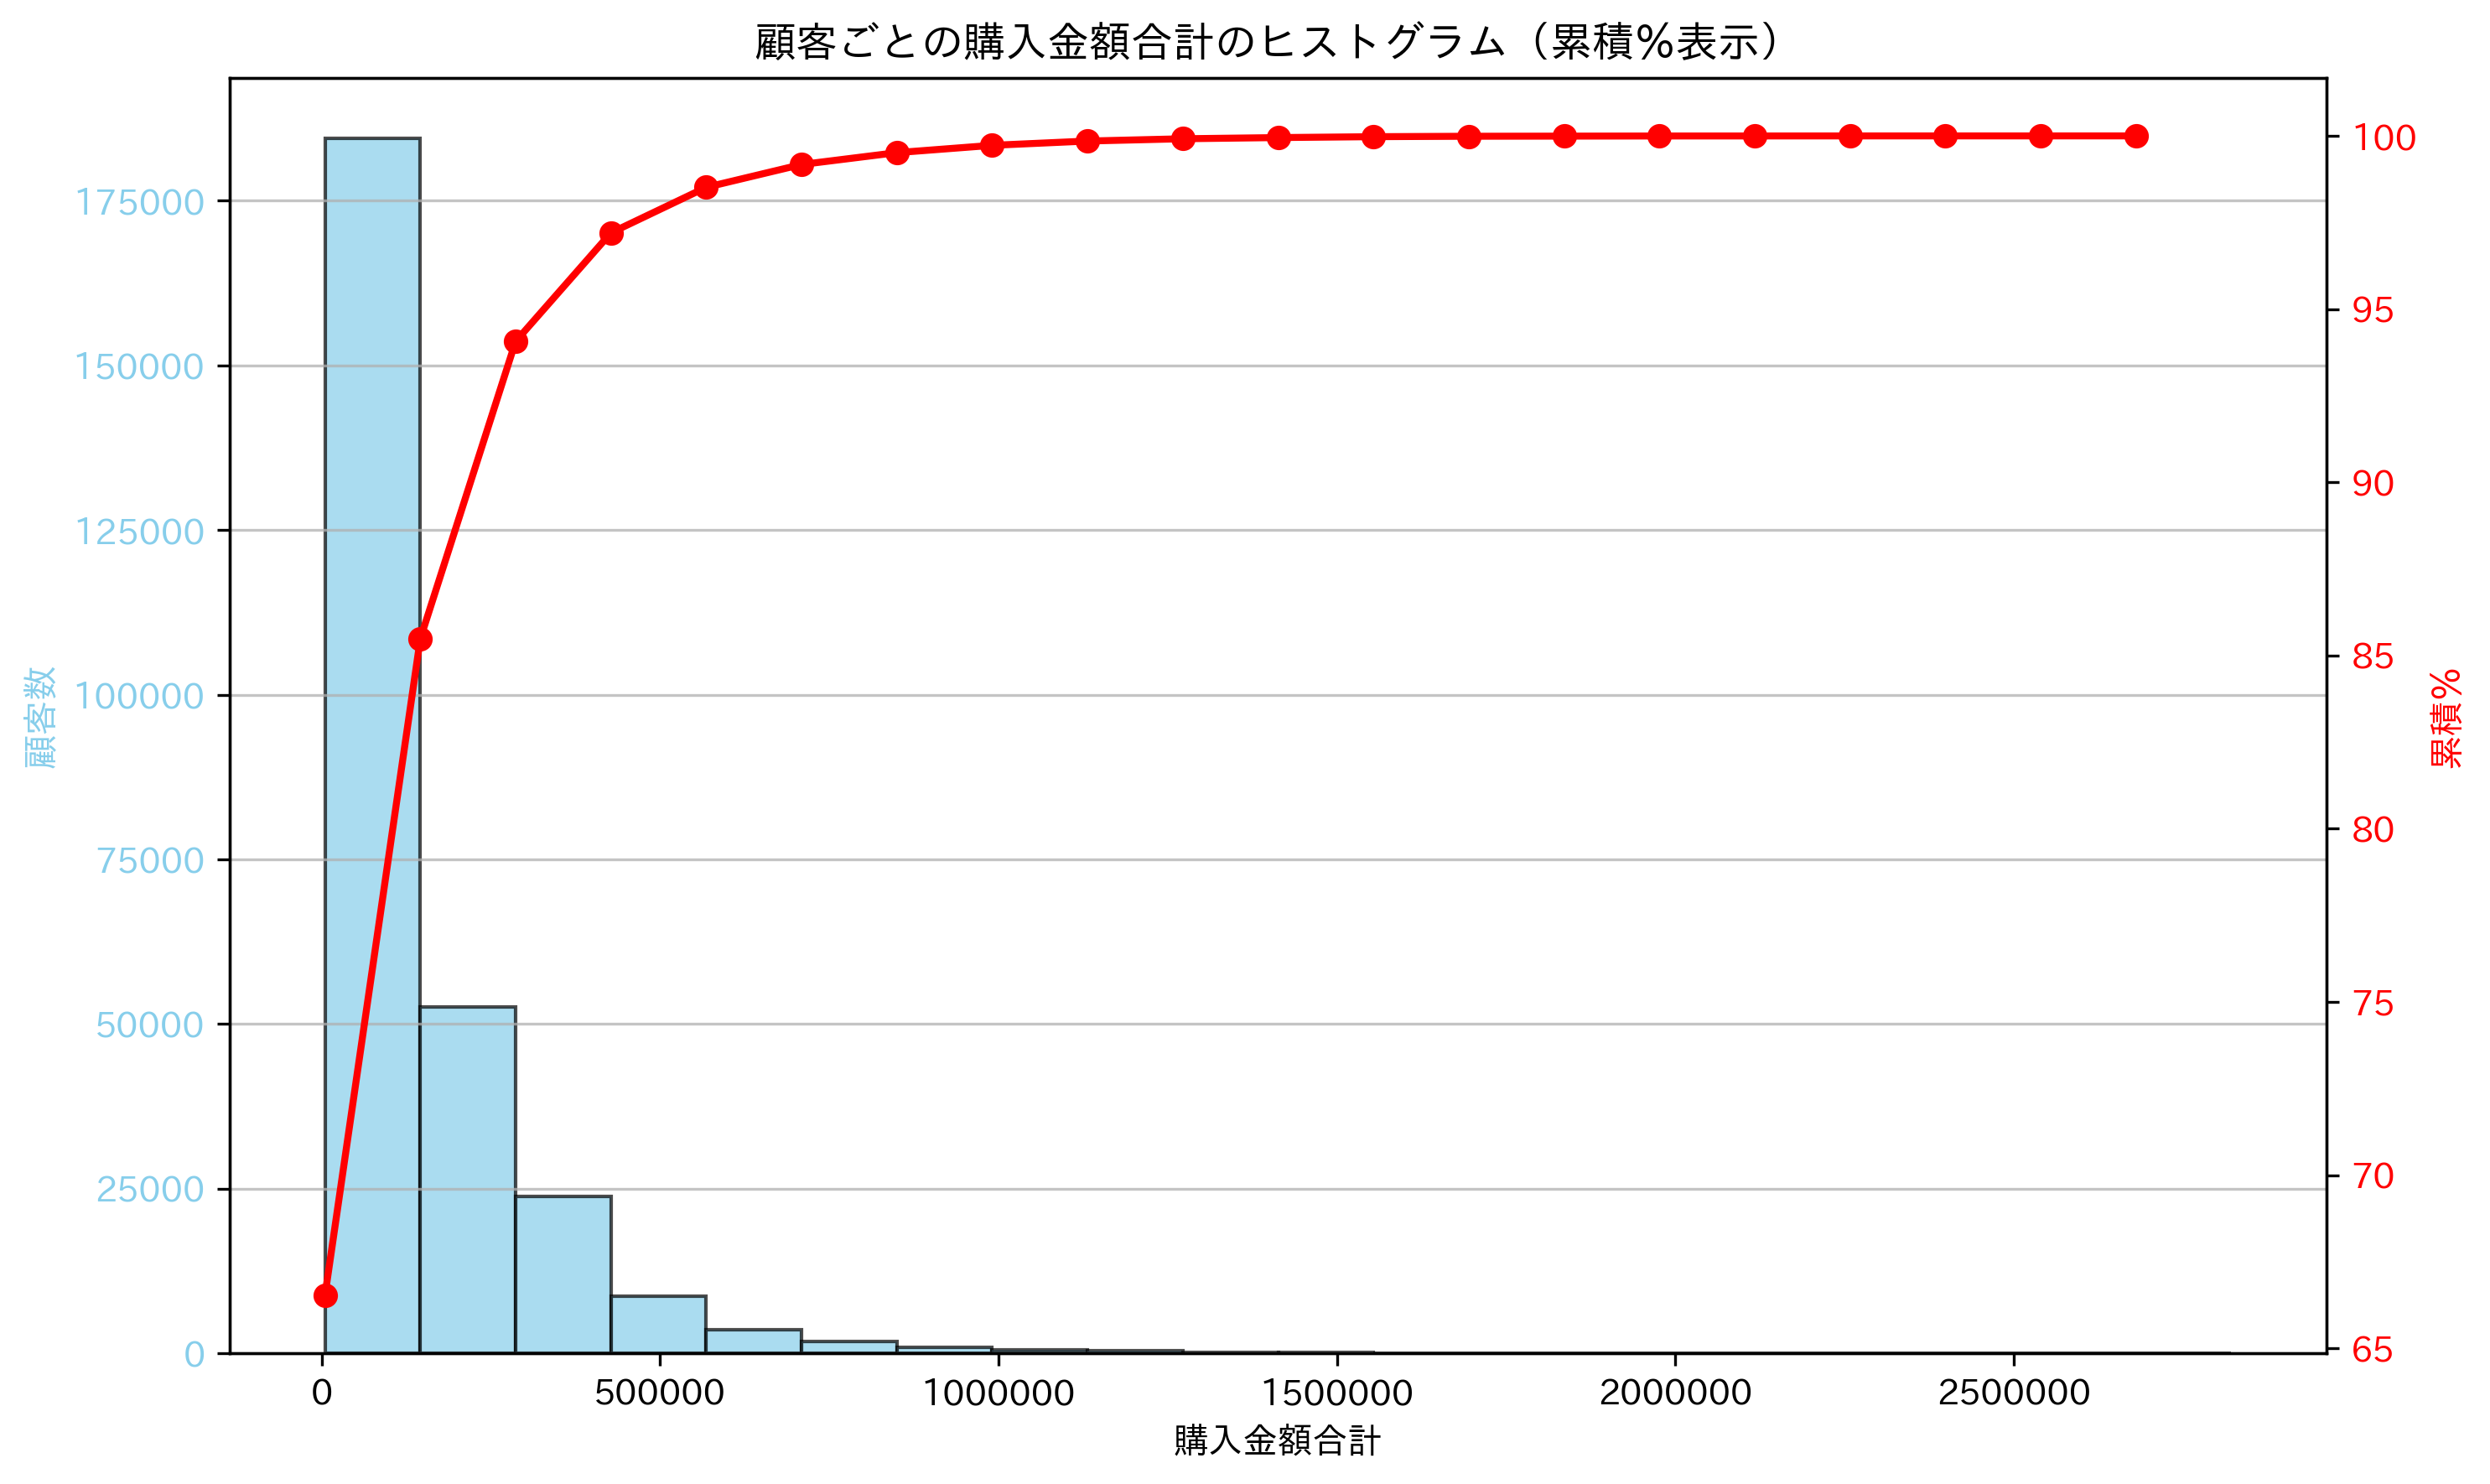

In [ ]:
# Monetary（顧客ごとの購入金額合計）の分布を可視化
#!pip install japanize_matplotlib
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

# データ準備
values = customer_purchase_sum['purchase_amount']
hist, bins = np.histogram(values, bins=20)
cumulative_percentage = np.cumsum(hist) / np.sum(hist) * 100

# プロット
fig, ax1 = plt.subplots(figsize=(10, 6), dpi=300)

# ヒストグラム（左軸）
ax1.hist(values, bins=bins, color='skyblue', edgecolor='black', alpha=0.7)
ax1.set_xlabel('購入金額合計')
ax1.set_ylabel('顧客数', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.grid(axis='y', alpha=0.75)
ax1.ticklabel_format(style='plain', axis='x')
# 累積％（右軸）
ax2 = ax1.twinx()
ax2.plot(bins[:-1], cumulative_percentage, color='red', marker='o', linewidth=2)
ax2.set_ylabel('累積％', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# タイトル
plt.title('顧客ごとの購入金額合計のヒストグラム（累積％表示）')

# 表示
plt.tight_layout()
plt.show()


8.3 Monetaryのヒストグラムの描画（1万円刻み）

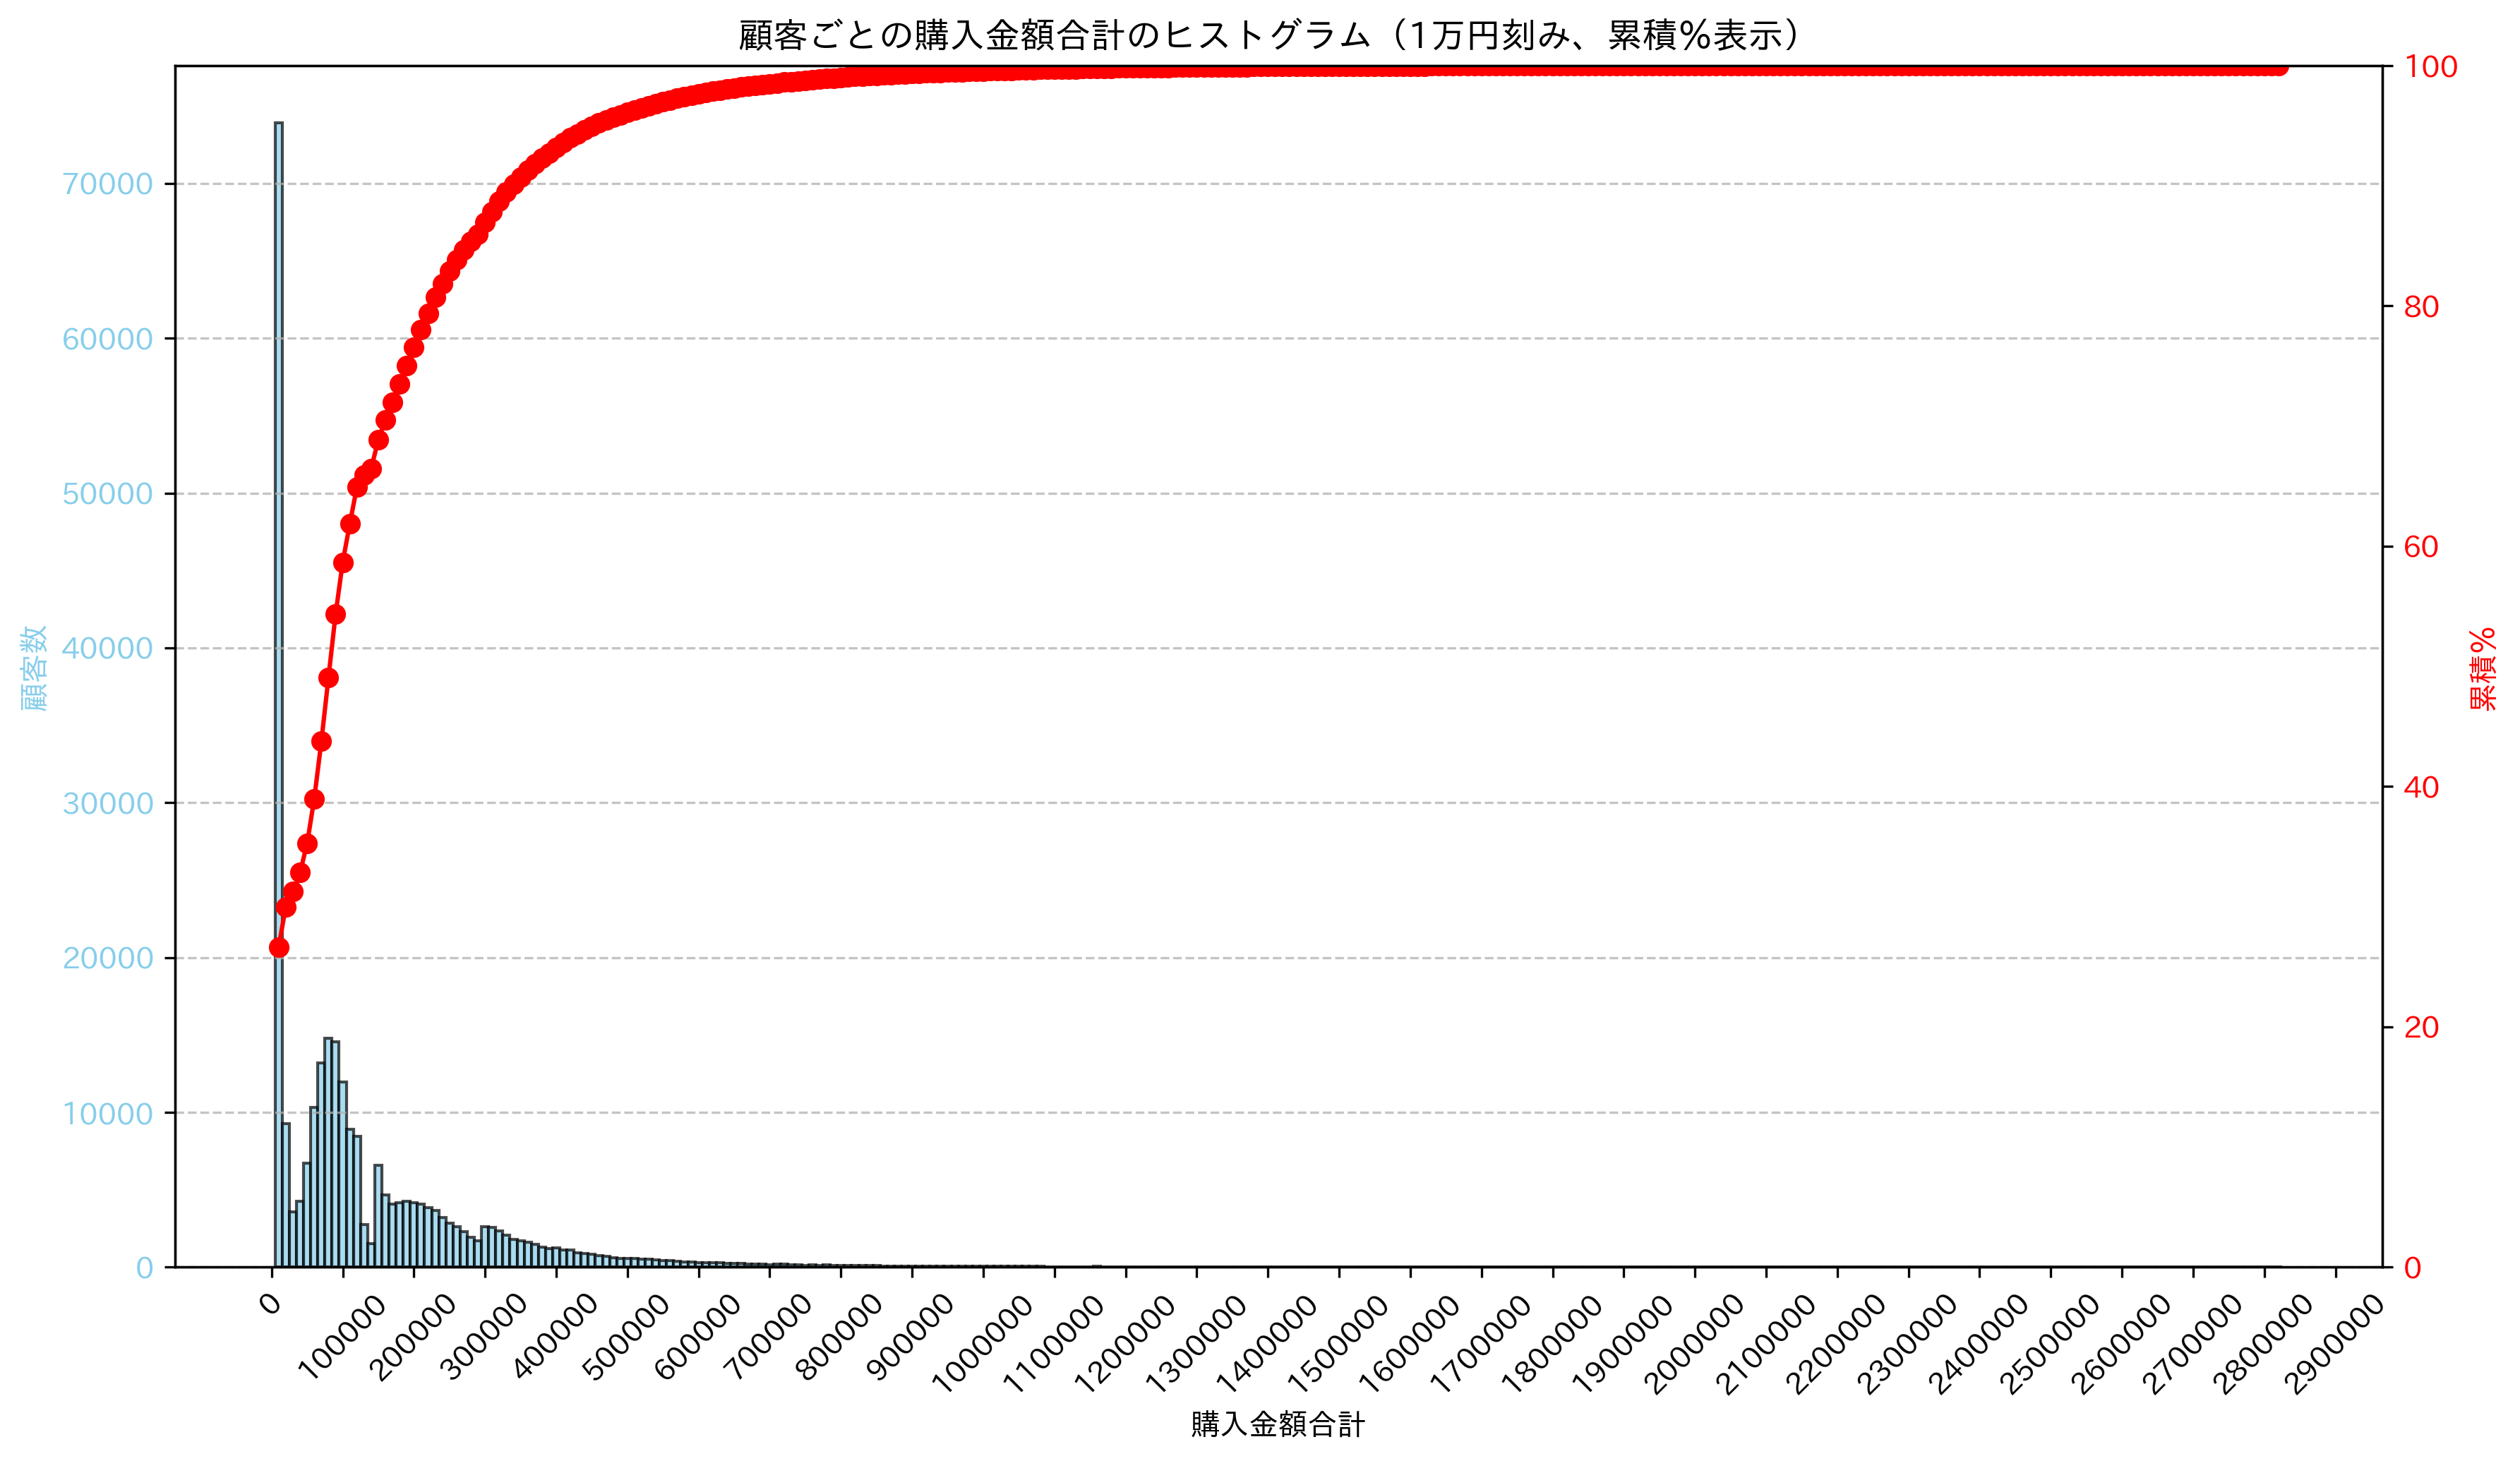

In [ ]:
# 顧客ごとの購入金額合計のヒストグラムを10000円刻みで描画
# ヒストグラムのデータ準備
values = customer_purchase_sum['purchase_amount']

# ビンの設定 (10000円刻み)
bin_width = 10000
# 最小値から最大値までの範囲でビンを作成
bins = np.arange(min(values), max(values) + bin_width, bin_width)

# 2軸グラフの作成
fig, ax1 = plt.subplots(figsize=(12, 7), dpi=300)

# Import ticker module
import matplotlib.ticker as ticker

# ヒストグラムのプロット (左軸)
hist, bins, patches = ax1.hist(values, bins=bins, color='skyblue', edgecolor='black', alpha=0.7)
ax1.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=False))
ax1.ticklabel_format(style='plain', axis='x')
ax1.set_xlabel('購入金額合計')
ax1.set_ylabel('顧客数', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.grid(axis='y', alpha=0.75, linestyle='--')

# 累積％の計算
cumulative_percentage = np.cumsum(hist) / np.sum(hist) * 100

# ビンの中心を計算して累積％のx座標とする
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# 累積％のプロット (右軸)
ax2 = ax1.twinx()
ax2.plot(bin_centers, cumulative_percentage, color='red', marker='o', linestyle='-')
ax2.set_ylabel('累積％', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 100) # 累積％なので0から100の範囲に固定

# x軸の目盛りを調整 (オプション)
# 10万円ごとに目盛りを表示する場合
max_amount = max(values)
ax1.set_xticks(np.arange(0, max_amount + 100000, 100000))
ax1.tick_params(axis='x', rotation=45)

# グラフタイトルの設定
plt.title('顧客ごとの購入金額合計のヒストグラム（1万円刻み、累積％表示）')

# レイアウトの調整
plt.tight_layout()

# グラフ表示
plt.show()

8.4 Monetaryをランク分け

In [4]:
# 金額階級ごとにランク名を付与しdf_M_RankにM_Rankという名称で格納
def categorize_monetary(amount):
    if amount <= 10000:
        return 'Very Low'
    elif amount <= 50000:
        return 'Low'
    elif amount <= 100000:
        return 'Medium'
    elif amount <= 300000:
        return 'High'
    else:
        return 'Very High'

customer_purchase_sum['M_Rank'] = customer_purchase_sum['purchase_amount'].apply(categorize_monetary)
customer_purchase_sum.head()

,customer_id,purchase_amount,purchase_rank,M_Rank
0,00010000,9300,Very Low,Very Low
1,00010001,8300,Very Low,Very Low
2,00010002,164700,High,High
3,00010003,46000,Low,Low
4,00010004,69300,Medium,Medium


8.5 ワンホットエンコーディング

In [ ]:
import pandas as pd

# データの読み込み
product_master = pd.read_csv('product_master.csv')

# ワンホットエンコーディング
city_dummies = pd.get_dummies(product_master['destination_city'])

# product_idと結合
product_city_onehot = pd.concat([product_master[['product_id']], city_dummies], axis=1)

# product_idごとに集計（都市が複数あれば1つでもあれば1）
product_city_onehot = product_city_onehot.groupby('product_id').max().reset_index()

# True/Falseを1/0に変換
product_city_onehot.iloc[:, 1:] = product_city_onehot.iloc[:, 1:].astype(int)

# 結果表示
product_city_onehot.head()

/tmp/ipython-input-9-618462749.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0         0
1         0
2         0
3         0
4         0
         ..
199995    0
199996    0
199997    0
199998    0
199999    0
Name: シドニー, Length: 200000, dtype: int64' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  product_city_onehot.iloc[:, 1:] = product_city_onehot.iloc[:, 1:].astype(int)
/tmp/ipython-input-9-618462749.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0         0
1         0
2         0
3         0
4         0
         ..
199995    0
199996    0
199997    0
199998    0
199999    0
Name: シンガポール, Length: 200000, dtype: int64' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  product_city_onehot.iloc[:, 1:] = product_city_onehot.iloc[:, 1:].astype(int)
/tmp/i

,product_id,シドニー,シンガポール,ソウル,ドバイ,ニューヨーク,バンコク,パリ,ロンドン,ローマ,...,旭川,松山,熊本,秋田,那覇,長崎,青森,静岡,香港,高松
0,0007ZNVK,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,000BK3XO,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,000G65QI,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,000KJZQ9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,000MRQW8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


8.6 　　最新購入日からの経過日数の計算

In [ ]:
# 6章で集計した最新購買日を改めて算出します
# purchase_dateをdatetime型に変換, エラーになる場合は無視して処理を続行
transaction_history['purchase_date'] = pd.to_datetime(transaction_history['purchase_date'], errors='coerce')

# エラーになる行を確認 (purchase_dateがNaTになっている行)
error_rows = transaction_history[transaction_history['purchase_date'].isnull()]
# print(f"Error rows:\n{error_rows}") ここは必要に応じて実行

# customer_idごとにpurchase_dateの最新日付を取得
latest_purchase_dates = transaction_history.groupby('customer_id')['purchase_date'].max().reset_index()

# 最新購入日を取得
max_date = latest_purchase_dates['purchase_date'].max()

# 各行の日付から最新日との差（日数）を計算 max_dateはログデータ内の最新の日付
latest_purchase_dates['経過日数'] = (max_date - latest_purchase_dates['purchase_date']).dt.days

# 結果表示
latest_purchase_dates.head()

,customer_id,purchase_date,経過日数
0,00010000,2018-11-30,2199.0
1,00010001,2021-10-18,1146.0
2,00010002,2018-01-15,2518.0
3,00010003,2018-03-27,2447.0
4,00010004,2024-12-07,0.0


In [ ]:
# 6章で集計した最新購買日を改めて算出します
# purchase_dateをdatetime型に変換, エラーになる場合は無視して処理を続行
transaction_history['purchase_date'] = pd.to_datetime(transaction_history['purchase_date'], errors='coerce')

# エラーになる行を確認 (purchase_dateがNaTになっている行)
error_rows = transaction_history[transaction_history['purchase_date'].isnull()]
# print(f"Error rows:\n{error_rows}") ここは必要に応じて実行

# customer_idごとにpurchase_dateの最新日付を取得
latest_purchase_dates = transaction_history.groupby('customer_id')['purchase_date'].max().reset_index()

# 結果を表示
latest_purchase_dates.head()

,customer_id,purchase_date
0,00010000,2018-11-30
1,00010001,2021-10-18
2,00010002,2018-01-15
3,00010003,2018-03-27
4,00010004,2023-02-03


8.7 日時型から日付型への変換

In [ ]:
import pandas as pd

# データフレームの作成
data = {'datetime': ['2023-06-01 14:23:45', '2023-06-02 16:15:22', '2023-06-03 09:05:10']}
df = pd.DataFrame(data)

# datetime型に変換
df['datetime'] = pd.to_datetime(df['datetime'])

# 日付部分を抽出
df['date'] = df['datetime'].dt.date

# 結果の表示
df

,datetime,date
0,2023-06-01 14:23:45,2023-06-01
1,2023-06-02 16:15:22,2023-06-02
2,2023-06-03 09:05:10,2023-06-03


In [ ]:
# 最新購入日を取得
max_date = latest_purchase_dates['purchase_date'].max()

# 各行の日付から最新日との差（日数）を計算 max_dateはログデータ内の最新の日付
latest_purchase_dates['経過日数'] = (max_date - latest_purchase_dates['purchase_date']).dt.days

# 結果表示
latest_purchase_dates.head()

,customer_id,purchase_date,経過日数
0,00010000,2018-11-30,2042.0
1,00010001,2021-10-18,989.0
2,00010002,2018-01-15,2361.0
3,00010003,2018-03-27,2290.0
4,00010004,2023-02-03,516.0


8.8 日時から時間帯のみへの変換

In [ ]:
import pandas as pd

# データフレームの作成
data = {'datetime': ['2023-06-01 14:23:45', '2023-06-02 16:15:22', '2023-06-03 09:05:10']}
df = pd.DataFrame(data)

# datetime列をdatetime型に変換
df['datetime'] = pd.to_datetime(df['datetime'])

# 時刻（時:分:秒）のみを抽出して新しい列を追加
df['time_only'] = df['datetime'].dt.strftime('%H:%M:%S')

# 結果を表示
df

,datetime,time_only
0,2023-06-01 14:23:45,14:23:45
1,2023-06-02 16:15:22,16:15:22
2,2023-06-03 09:05:10,09:05:10


8.9 休日・祝日フラグの作成

In [ ]:
#ライブラリのインストール
!pip install pandas holidays

In [ ]:
import pandas as pd
import holidays

# サンプルの日時データを作成
data = {
    'date': pd.date_range(start='2024-01-01', end='2024-01-10', freq='D')
}
df = pd.DataFrame(data)

# 日本の祝日を取得
jp_holidays = holidays.Japan(years=[2024])

# 祝日フラグを立てる (祝日なら1、平日なら0)
df['holiday_flag'] = df['date'].apply(lambda x: 1 if x in jp_holidays else 0)

# 結果を表示
df.head()

,date,holiday_flag
0,2024-01-01,1
1,2024-01-02,0
2,2024-01-03,0
3,2024-01-04,0
4,2024-01-05,0
